In [5]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import quandl
quandl.ApiConfig.api_key = 'JgrixskwB3MtGDkJtxms'
%matplotlib inline

In [6]:
start = pd.to_datetime('2012-01-01')
end = pd.to_datetime('2017-08-01')

In [8]:
aapl = quandl.get('WIKI/AAPL.11',start_date=start,end_date=end)
cisco = quandl.get('WIKI/CSCO.11',start_date=start,end_date=end)
ibm = quandl.get('WIKI/IBM.11',start_date=start,end_date=end)
amzn = quandl.get('WIKI/AMZN.11',start_date=start,end_date=end)

In [13]:
aapl.iloc[0]['Adj. Close']

52.848786580038002

In [14]:
aapl['Adj. Close'][0]

52.848786580038002

In [17]:
for stock_df in (aapl,cisco,ibm,amzn):
    stock_df['Normed Return'] = stock_df['Adj. Close']/stock_df['Adj. Close'][0]

In [26]:
# 30% in aapl
# 20% in cisco
# 40% amzn
# 10% ibm
for stock_df, alloc in zip((aapl,cisco,amzn, ibm), [.3, .2, .4, .1]):
    stock_df['Allocation'] = stock_df['Normed Return']*alloc

In [27]:
aapl.head()

,Adj. Close,Normed Return,Allocation
Date,,,
2012-01-03,52.848787,1.000000,0.300000
2012-01-04,53.132802,1.005374,0.301612
2012-01-05,53.722681,1.016536,0.304961
2012-01-06,54.284287,1.027162,0.308149
2012-01-09,54.198183,1.025533,0.307660


In [29]:
init_inv = 1000000
for stock_df in (aapl,cisco,ibm,amzn):
    stock_df['Position Values'] = stock_df['Allocation']*init_inv 

In [31]:
aapl.tail()

,Adj. Close,Normed Return,Allocation,Position Values
Date,,,,
2017-07-26,152.839860,2.892022,0.867607,867606.638056
2017-07-27,149.951579,2.837370,0.851211,851211.100128
2017-07-28,148.895863,2.817394,0.845218,845218.248334
2017-07-31,148.248489,2.805145,0.841543,841543.386385
2017-08-01,149.443640,2.827759,0.848328,848327.746906


In [32]:
all_position_vals = [aapl['Position Values'],cisco['Position Values'],ibm['Position Values'],amzn['Position Values']]
portfolio_val = pd.concat(all_position_vals, axis=1)

In [35]:
portfolio_val.columns = ['AAPL Position Values', 'CSCO Position Values', 'IBM Position Values', 'AMZN Position Values']

In [36]:
portfolio_val.head()

,AAPL Position Values,CSCO Position Values,IBM Position Values,AMZN Position Values
Date,,,,
2012-01-03,300000.000000,200000.000000,100000.000000,400000.000000
2012-01-04,301612.236461,203864.734300,99592.055824,396603.921131
2012-01-05,304960.727573,203113.258186,99119.699410,396827.347372
2012-01-06,308148.724558,202361.782072,97981.749866,407998.659443
2012-01-09,307659.946988,203650.026838,97471.819646,398949.896665


In [37]:
portfolio_val['Total'] = portfolio_val.sum(axis=1)

In [39]:
portfolio_val.tail()

,AAPL Position Values,CSCO Position Values,IBM Position Values,AMZN Position Values,Total
Date,,,,,
2017-07-26,867606.638056,401960.843289,90380.652592,2.352231e+06,3.712180e+06
2017-07-27,851211.100128,400818.187702,90200.338962,2.337038e+06,3.679268e+06
2017-07-28,845218.248334,400183.379042,89715.357474,2.279037e+06,3.614154e+06
2017-07-31,841543.386385,399294.646919,89951.630506,2.206960e+06,3.537749e+06
2017-08-01,848327.746906,401833.881558,90343.346323,2.225750e+06,3.566255e+06


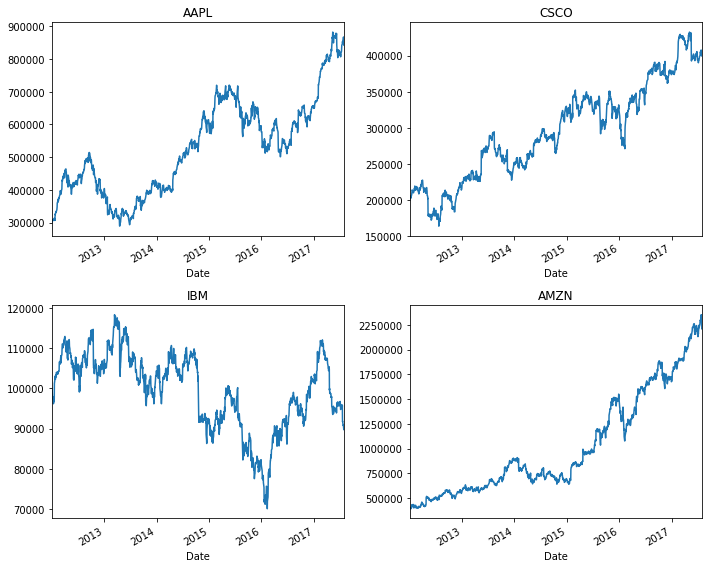

In [51]:
fig, axes = plt.subplots(nrows=2, ncols=2)
portfolio_val['AAPL Position Values'].plot(ax=axes[0,0], figsize=(10,8))
axes[0,0].set_title('AAPL')
portfolio_val['CSCO Position Values'].plot(ax=axes[0,1], figsize=(10,8))
axes[0,1].set_title('CSCO')
portfolio_val['IBM Position Values'].plot(ax=axes[1,0], figsize=(10,8)) 
axes[1,0].set_title('IBM')
portfolio_val['AMZN Position Values'].plot(ax=axes[1,1],figsize=(10,8)) 
axes[1,1].set_title('AMZN');
# portfolio_val['Total'].plot(ax=axes[2,0],figsize=(10,8)) 
#axes.set_title('Total Portfolio Value');
plt.tight_layout()

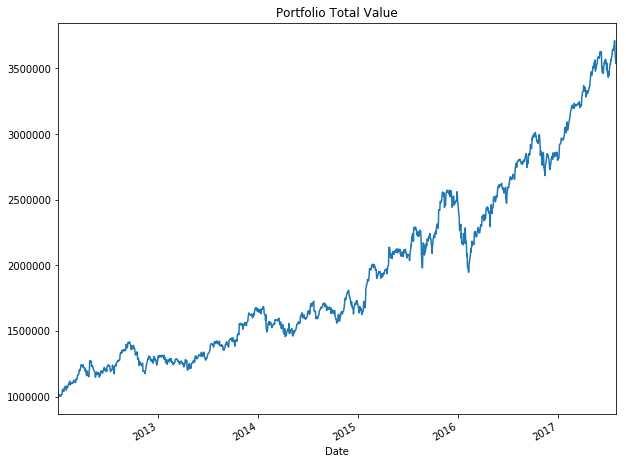

In [55]:
portfolio_val['Total'].plot(figsize=(10,8), title="Portfolio Total Value");

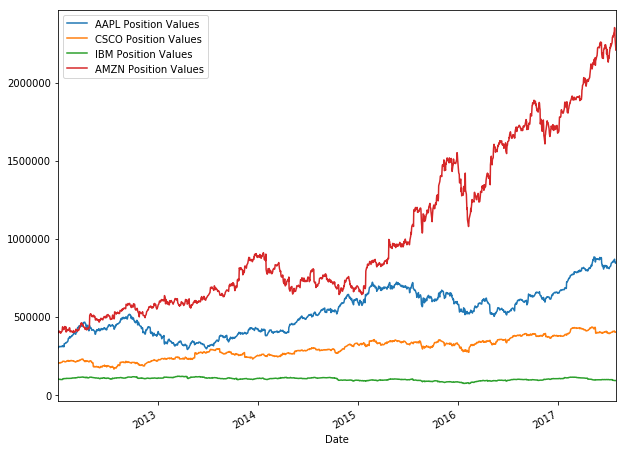

In [57]:
portfolio_val.drop('Total', axis=1).plot(figsize=(10,8));

In [58]:
portfolio_val['Daily Return'] = portfolio_val['Total'].pct_change(1)

In [59]:
portfolio_val.head()

,AAPL Position Values,CSCO Position Values,IBM Position Values,AMZN Position Values,Total,Daily Return
Date,,,,,,
2012-01-03,300000.000000,200000.000000,100000.000000,400000.000000,1.000000e+06,NaN
2012-01-04,301612.236461,203864.734300,99592.055824,396603.921131,1.001673e+06,0.001673
2012-01-05,304960.727573,203113.258186,99119.699410,396827.347372,1.004021e+06,0.002344
2012-01-06,308148.724558,202361.782072,97981.749866,407998.659443,1.016491e+06,0.012420
2012-01-09,307659.946988,203650.026838,97471.819646,398949.896665,1.007732e+06,-0.008617


In [61]:
avg_daily_ret = portfolio_val['Daily Return'].mean()
std_dailty_ret = portfolio_val['Daily Return'].std()

In [64]:
print("Avg Daily Ret: " + str(avg_daily_ret) + "\n" + "Daily Ret Standard Dev " + str(std_dailty_ret))

Avg Daily Ret: 0.000984681950515
Daily Ret Standard Dev 0.0125013636018


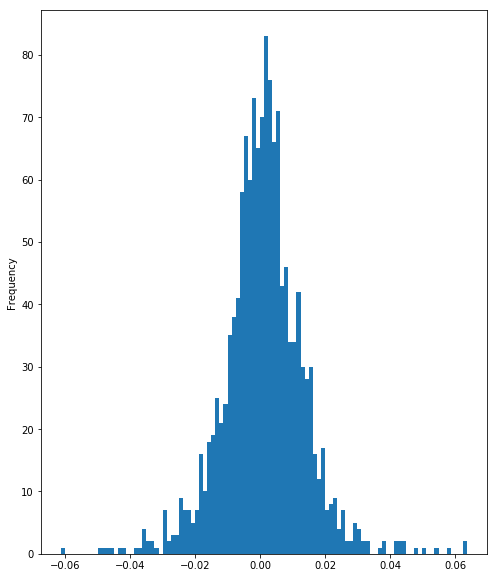

In [67]:
portfolio_val['Daily Return'].plot(kind='hist', bins=100, figsize=(8,10));

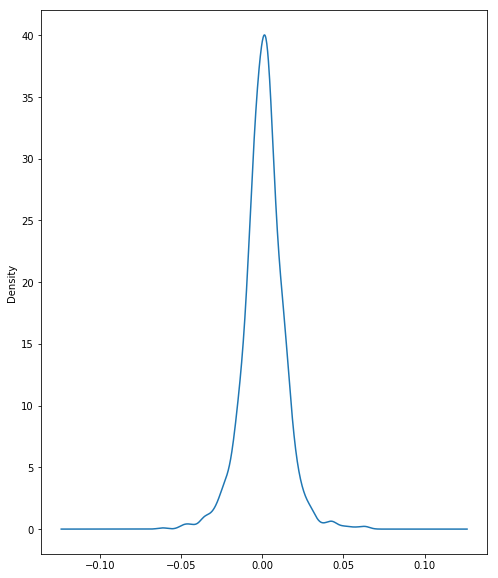

In [69]:
portfolio_val['Daily Return'].plot(kind='kde', figsize=(8,10));

In [78]:
cumlative_ret = 100 * (portfolio_val['Total'][-1]/portfolio_val['Total'][0]-1)
print("Cumulative Return: " + str(cumlative_ret))
print('Our return {} was percent!'.format(cumlative_ret))

Cumulative Return: 256.625484911
Our return 256.6254849109926 was percent!


In [74]:
portfolio_val['Total'][-1]

3566254.8491099263

In [75]:
portfolio_val['Total'][0]

1000000.0

In [77]:
3566254.8491099263/1000000.0 -1

2.566254849109926

In [80]:
portfolio_val['Total'][-1] - init_inv

2566254.8491099263

In [ ]:
# Sharpe ratio = (mean portfolio ret - risk free rate)/std

In [84]:
SharpeRatio = (portfolio_val['Daily Return'].mean() - 0)/portfolio_val['Daily Return'].std()
SharpeRatio

0.078765963608119771

In [87]:
AnnualizedSharpeRatio = np.sqrt(252) * SharpeRatio

In [88]:
AnnualizedSharpeRatio

1.2503709089006922